In [1]:
DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
movie ='130721_CCA60_RAW'

MOVIE_PATH = DATA_PATH +movie +'/'
GRAPH_PATH = 'C:Users/amityu/Gel_Sheet_Graph/'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from skimage.filters import gaussian
from tqdm.notebook import trange, tqdm
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
import preprocessing
import importlib


In [2]:
gel = np.load(MOVIE_PATH + 'np/gel.npy', mmap_mode='r')

#masked = np.load(MOVIE_PATH + 'np/gel_masked_added8.npy', mmap_mode='r')
#mask = np.load(MOVIE_PATH + 'np/mask.npy', mmap_mode='r')


In [1]:
gel._mmap.close()


NameError: name 'gel' is not defined

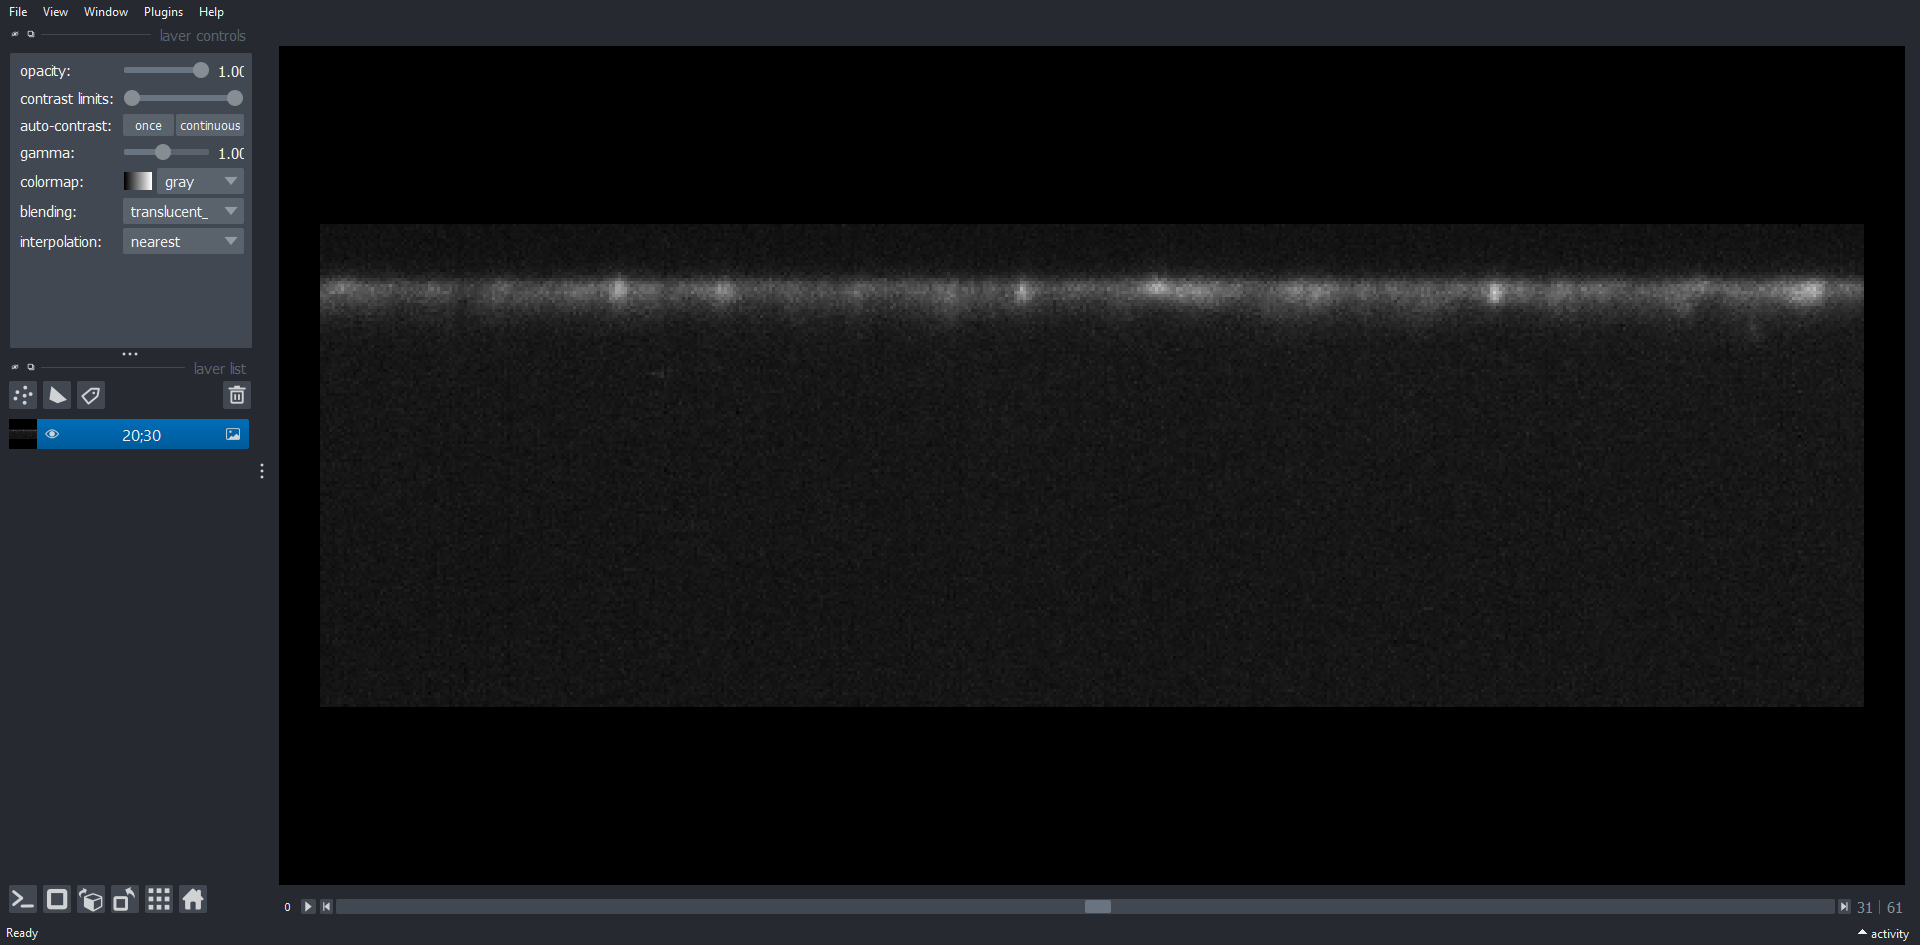

In [6]:
import napari

viewer = napari.Viewer()
image =gel[:,:,:, 300]
viewer.add_image(image, name='20;30')
napari.utils.nbscreenshot(viewer)

In [24]:
mask1 = np.load(MOVIE_PATH + 'np/mask_bil.npy', mmap_mode='r')

In [4]:
#load gel_norm_black
gel_black = np.load(MOVIE_PATH + 'np/gel_norm_black.npy', mmap_mode='r')

In [9]:
#mask1[:,0:15,:,:] = False

image =gel[0:10,:,:, 256]
viewer.add_image(image, name='0:10')

<Image layer '0:10' at 0x1b4804dcca0>

In [ ]:
#close mmap mask


In [12]:
from skimage import morphology
image = open_mask[45, :, :, 256]
open = morphology.opening(image)
viewer.add_image(open.T, name='dil')


<Image layer 'dil [2]' at 0x27fe34c9de0>

In [ ]:
open_list = []
open_mask = np.zeros(mask.shape)
for t in trange(len(mask)):
    for x in range(mask.shape[3]):
        open_mask[t,:,:,x] = morphology.opening(open_mask[t,:,:,x])

viewer.add_image(open_mask[:,:,:,30], name='open_30')


In [10]:
for t in np.array([5,25,45,65,85]):
    viewer.add_image(open_mask [t,:,:,:], name='mask %d'%t)


In [4]:
x = 30
for t in range(5,95,10):
    image =gel[t,:,:,:].copy()
    #thresh = filters.threshold_li(image)
    #binary = image > thresh
    #image[~binary] = 0
    viewer.add_image(image, name='gel %d x=%d'%t)

# add sobel filter to each image


In [21]:
 viewer.add_image(open_mask[t,:,:,x], name='open %d'%t)

<Image layer 'open 93' at 0x2336c344610>

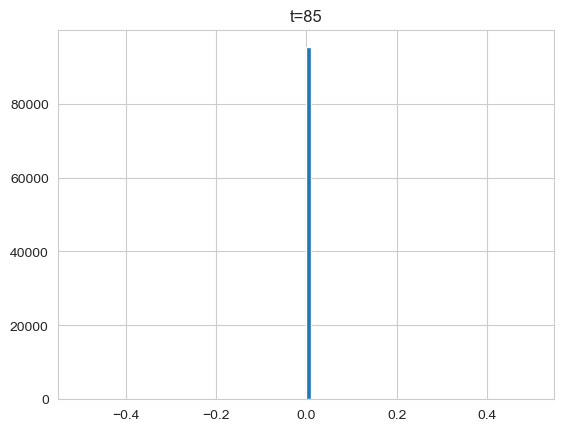

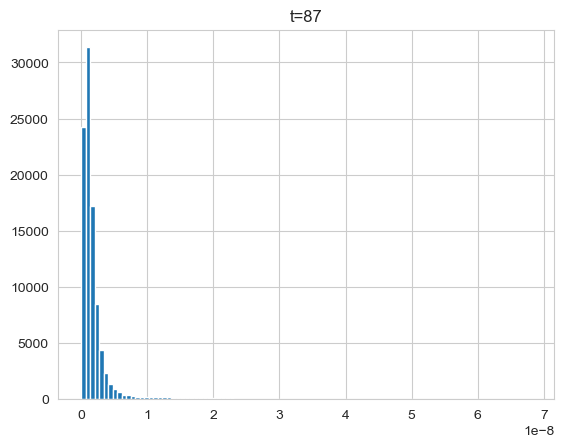

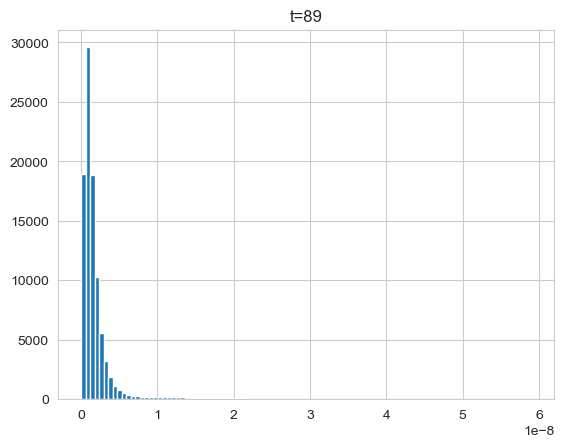

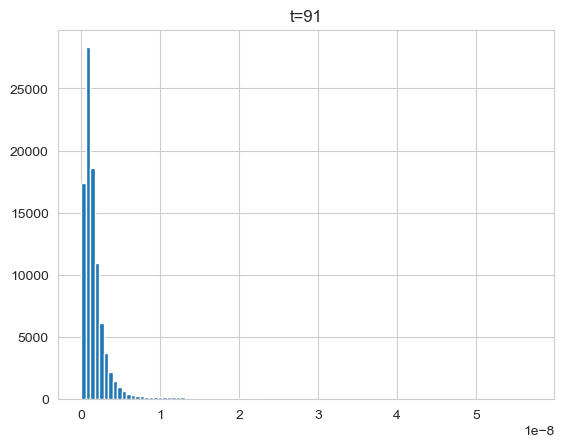

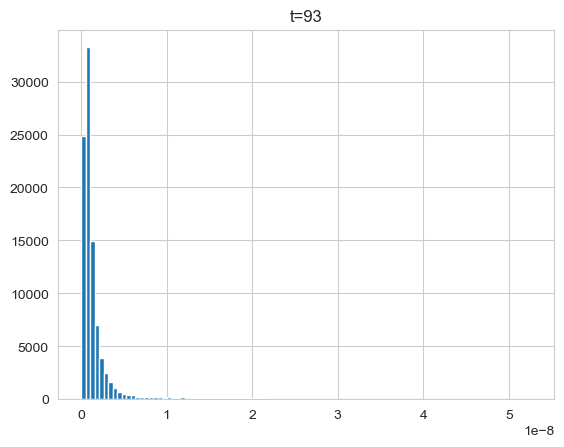

In [8]:
for t in range(85,95,2):
    plt.hist(filters.sobel(gel[t,:,:,256]).flatten(), bins=100)
    plt.title('t=%d'%t)
    plt.show()



In [ ]:
#threshold with otsu
for t in range(85,95,2):
    plt.hist(filters.threshold_otsu(gel[t,:,:,256]), bins=100)
    plt.title('t=%d'%t)
    plt.show()
for t in range(85,95,2):
    plt.hist(gel[t,:,:,256].flatten(), bins=100)
    plt.title('t=%d'%t)
    plt.show()

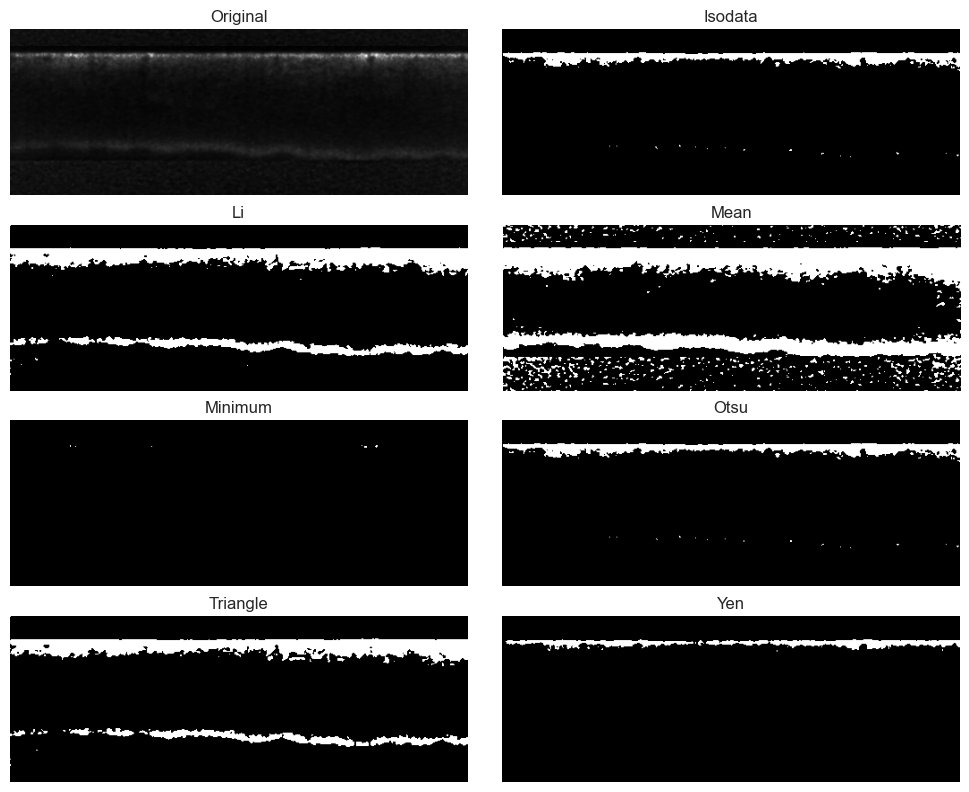

In [10]:
#view all thresholds in skimage.filters.thresholding
# Apply all the thresholding methods and display the results
image = gel[91,:,:,256]
fig, ax = filters.try_all_threshold(image, figsize=(10, 8), verbose=False)
plt.show()